In [18]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import filters as skfilt

In [7]:
sys.path.append('/Users/mm40108/projects/datadays17/olfactory_protein_viz/src/')
from ecallen.ecallen import images as ecimg

In [11]:
DATA_DIR = "/Users/mm40108/projects/datadays17/olfactory_protein_viz/data"

organism = 'DevMouse'
protein = 'Bmpr2'
experiment = '100042306'

exp_dir = os.path.join(DATA_DIR, organism, protein, experiment)
img_files = [os.path.join(exp_dir, file) for file in os.listdir(exp_dir) if not file.startswith('.')]
print('lets view images from :', exp_dir, '\n\t'.join(img_files))

lets view images from : /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306 /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/10_100878687.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/11_100878705.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/12_100878600.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/13_100878599.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/14_100878601.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/15_100878666.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/16_100878636.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/17_100878688.jpg
	/Users/mm40108/projects/datadays17/olfactory_prot

In [12]:
imgs = {img_file:imread(img_file) for img_file in img_files}

/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (114636032 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (122435072 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (95477760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (113417472 pixels) exceeds limit of 89478485 pixels, c

In [ ]:
# plot all the images into a figure with 10 columns and expanding rows
fig = plt.figure()
ncol = 5
rowct = 1
colct = 1
for image_file, img in imgs.items():
    small_img = img[2000:7000, :5000, :]
    ax1 = fig.add_subplot(rowct, ncol, colct)
    ax1.imshow(small_img)
    ax1.set_aspect('equal')
    if colct < ncol:
        colct += 1
    else:
        rowct += 1
        colct = 1


In [ ]:
plt.show()

(5000, 5000, 3)


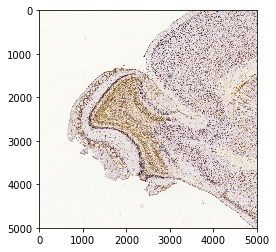

In [40]:
# lets process this sample image
imgs.keys()
img = imgs['/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/10_100878687.jpg']
small_img = img[2000:7000, :5000, :]

print(small_img.shape)
plt.imshow(small_img)

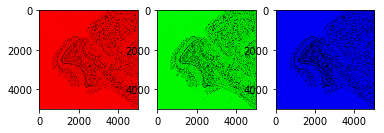

In [45]:
# let's look at the channels:
red = 0
green = 1
blue = 2
channels = [red, green, blue]

fig = plt.figure()
for c in channels:
    ax = fig.add_subplot(1, 3, c+1)
    plt_img = np.zeros_like(small_img)
    plt_img[:, :, c] = small_img[:, :, c]
    ax.imshow(plt_img, interpolation='Nearest')
plt.show()

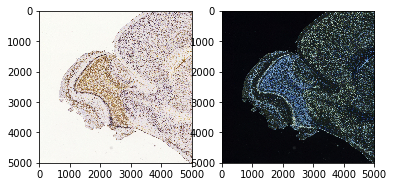

In [46]:
# invert image so that color = neuron
invert_image = lambda img: 255 - img
inv_img = invert_image(small_img)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(small_img, interpolation='nearest', cmap='gray')

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(inv_img, interpolation='nearest', cmap='gray')
plt.show()

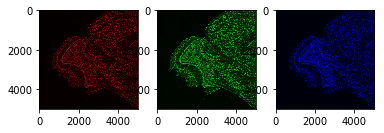

In [47]:
fig = plt.figure()
for c in channels:
    ax = fig.add_subplot(1, 3, c+1)
    plt_img = np.zeros_like(inv_img)
    plt_img[:, :, c] = inv_img[:, :, c]
    ax.imshow(plt_img, interpolation='Nearest')
plt.show()

{'plane_of_section': 'sagittal', 'red_channel': None, 'green_channel': None, 'blue_channel': None, 'is_FISH': False, 'is_ISH': True, 'probes': ['bmpr2'], 'section_thickness': 25.0, 'genotype': '350-1888'}
no special channels


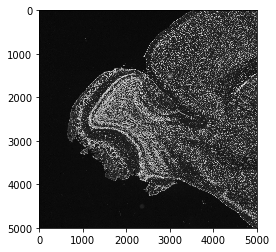

In [51]:
# get experiment parameters
exp_params = ecimg.get_imaging_params(experiment)
print(exp_params)

# since all 3 color channels have "none"
red_c = exp_params['red_channel']
green_c = exp_params['green_channel']
blue_c = exp_params['blue_channel']

if any([True for c in [red_c, green_c, blue_c] if c is not None]):
    print('pay attention to channels')
    special_channels = [red_c, green_c]
    correct_channels_img = inv_img[:,:, special_channels]
else:
    print('no special channels')
    special_channels = None
    correct_channels_img = inv_img

# make black and white depending on experiment parameters
# by taking the maximum pix intensity across the appropriate channels
bw_img = np.max(correct_channels_img, axis = 2)

plt.imshow(bw_img, cmap='gray')